In [44]:
#(1)
print('221115:ML:DecisionTreeClassification')
import datetime
print(datetime.datetime.now() )
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier  ##SVC でなく、決定木
import os
iris = load_iris()
print("iris.data.shape=",iris.data.shape)
X = iris.data[:,0:]  ###X = iris.data[:,2:] #一部の木の場合
y = iris.target
print("X.shape=",X.shape)
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X, y)
from graphviz import Source
from sklearn.tree import export_graphviz
print("iris.feature_names[0:]=",iris.feature_names)###[0:])
print("iris.target_names=",iris.target_names)
export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names[0:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

221115:ML:DecisionTreeClassification
2022-11-15 07:14:32.778792
iris.data.shape= (150, 4)
X.shape= (150, 4)
iris.feature_names[0:]= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names= ['setosa' 'versicolor' 'virginica']


In [45]:
!ls -la

total 424
drwxr-xr-x 1 root root   4096 Nov 15 07:06 .
drwxr-xr-x 1 root root   4096 Nov 15 06:56 ..
drwxr-xr-x 4 root root   4096 Nov 11 14:31 .config
-rw-r--r-- 1 root root   2049 Nov 15 07:14 iris_tree.dot
-rw-r--r-- 1 root root 128765 Nov 15 07:01 iris_tree.png
drwxr-xr-x 1 root root   4096 Nov 11 14:32 sample_data
-rw-r--r-- 1 root root  12583 Nov 15 07:06 wine-count-plt.png
-rw-r--r-- 1 root root 264426 Nov 15 07:03 winequality-white.csv


In [46]:
!dot -Tpng iris_tree.dot -o iris_tree.png

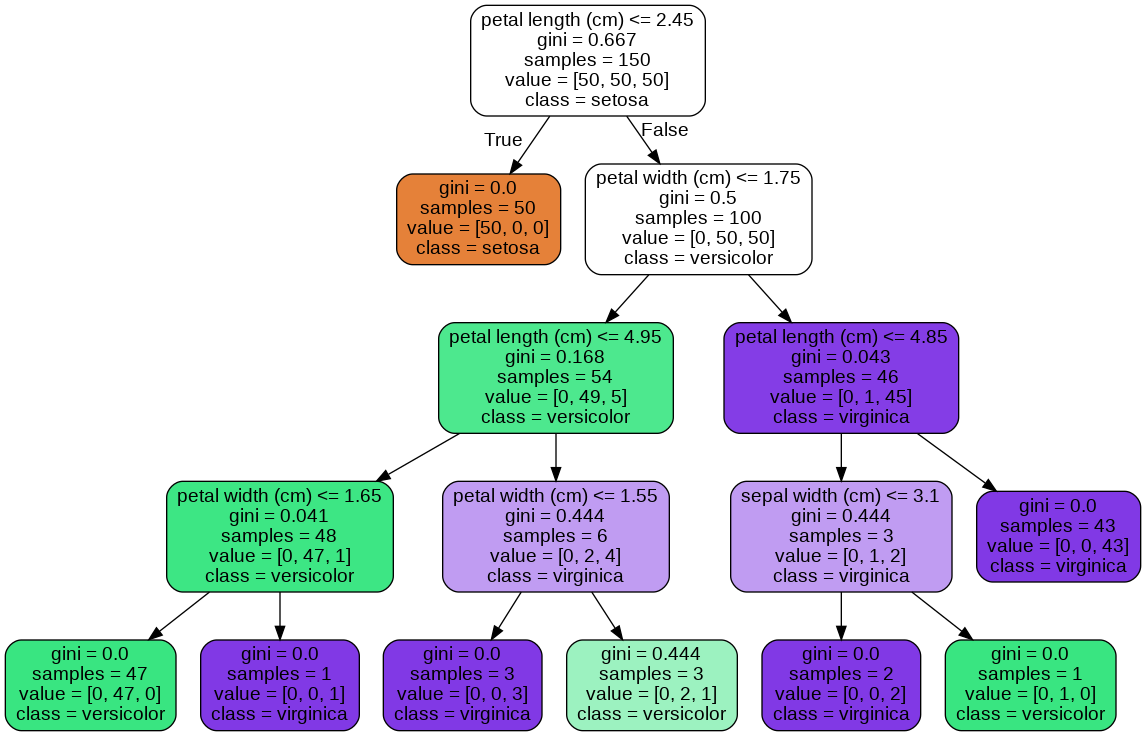

In [47]:
from IPython.display import Image,display_png 
display_png(Image('iris_tree.png'))

In [48]:
from urllib.request import urlretrieve 
url = "https://archive.ics.uci.edu" + \
      "/ml/machine-learning-databases/wine-quality" + \
      "/winequality-white.csv" 
savepath = "winequality-white.csv"
urlretrieve(url, savepath)


('winequality-white.csv', <http.client.HTTPMessage at 0x7f0525accdd0>)

In [49]:
!ls -la

total 424
drwxr-xr-x 1 root root   4096 Nov 15 07:06 .
drwxr-xr-x 1 root root   4096 Nov 15 06:56 ..
drwxr-xr-x 4 root root   4096 Nov 11 14:31 .config
-rw-r--r-- 1 root root   2049 Nov 15 07:14 iris_tree.dot
-rw-r--r-- 1 root root 128765 Nov 15 07:14 iris_tree.png
drwxr-xr-x 1 root root   4096 Nov 11 14:32 sample_data
-rw-r--r-- 1 root root  12583 Nov 15 07:06 wine-count-plt.png
-rw-r--r-- 1 root root 264426 Nov 15 07:14 winequality-white.csv


In [50]:
#(7)##kujira_3####wine_simple.py####################################
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# データを読み込む
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# データをラベルとデータに分離 ---(*1)
y = wine["quality"]
x = wine.drop("quality", axis=1)
# 学習用とテスト用に分割する ---(*2)
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2)
# 学習する ---(*3)
model = RandomForestClassifier()
model.fit(x_train, y_train)
# 評価する ---(*4)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率=", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.82      0.28      0.42        32
           5       0.73      0.69      0.71       299
           6       0.63      0.80      0.71       422
           7       0.67      0.49      0.57       184
           8       0.87      0.35      0.50        37
           9       0.00      0.00      0.00         2

    accuracy                           0.67       980
   macro avg       0.53      0.37      0.41       980
weighted avg       0.68      0.67      0.66       980

正解率= 0.6704081632653062


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
#(8)
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


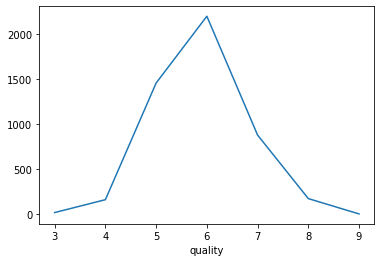

In [52]:
#(9)##kujira_4  count_wine_data.py
import matplotlib.pyplot as plt
import pandas as pd
# ワインデータの読み込み
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# 品質データごとにグループ分けして、その数を数える
count_data = wine.groupby('quality')["quality"].count()
print(count_data)
# 数えたデータをグラフに描画
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [53]:
#(10)##kujira4  y のラベルをつけ直す
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# データを読み込む --- (*1)（再度)
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
# データをラベルとデータに分離
y = wine["quality"]##quality は目的変数、target
x = wine.drop("quality", axis=1)##目的変数quality を除いて、その他＝説明変数を抽出、axis=1 は列を指定
print("list(y)=",list(y) )
# y のラベルをつけ直す --- (*2)
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y2 = newlist
# 学習用とテスト用に分割する --- (*3)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.2)
# 学習する --- (*4)
model2 = RandomForestClassifier(criterion="gini")
model2.fit(x_train2, y_train2)
print("y=newlist=",y2)
# 評価する --- (*5)
y_pred2 = model2.predict(x_test2)
print(classification_report(y_test2, y_pred2))
print("正解率=", accuracy_score(y_test2, y_pred2))
#正解率= 0.9438775510204082  ##criterion="gini" (default)
#正解率= 0.9448979591836735  ##criterion="entropy"

list(y)= [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 7, 5, 7, 6, 8, 6, 5, 8, 7, 8, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 4, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 5, 8, 5, 6, 5, 5, 6, 8, 5, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 7, 7, 6, 6, 7, 4, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 4, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 7, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 4, 7, 6, 7, 6, 6, 5, 6, 6, 6, 7, 8, 8, 7, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 4, 7, 5, 6, 4, 5, 4, 6, 6, 5, 5, 6, 5, 5, 6, 5, 8, 4, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 6, 5, 7, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 7, 6, 5, 6, 7, 7, 7, 5, 4, 3, 5, 3, 6, 8, 7, 7, 6, 4, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 4, 7, 8, 8, 4, 5, 5, 5, 6, 7, 7, 7, 7, 6, 5, 7, 3, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 7, 6, 7, 8, 6, 6, 5, 6, 6, 5, 7, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 5, 

In [54]:
#(11)##https://data-analysis-stats.jp/機械学習/randomforest のdtreeviz で決定木の可視化/
print("x_train.shape=",x_train.shape)
x_train.describe()

x_train.shape= (3918, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.863247,0.277726,0.335084,6.412238,0.045855,35.414242,138.833078,0.994047,3.186503,0.490416,10.500488
std,0.841545,0.099884,0.119627,4.993038,0.021508,17.012668,42.352995,0.002901,0.150661,0.114246,1.219510
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.230000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,109.000000,0.991800,3.080000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,134.000000,0.993800,3.170000,0.480000,10.400000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,168.000000,0.996142,3.280000,0.550000,11.345833
max,14.200000,1.100000,1.000000,31.600000,0.290000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000


In [55]:
#(12)##
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3918 entries, 1975 to 1977
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
dtypes: float64(11)
memory usage: 367.3 KB


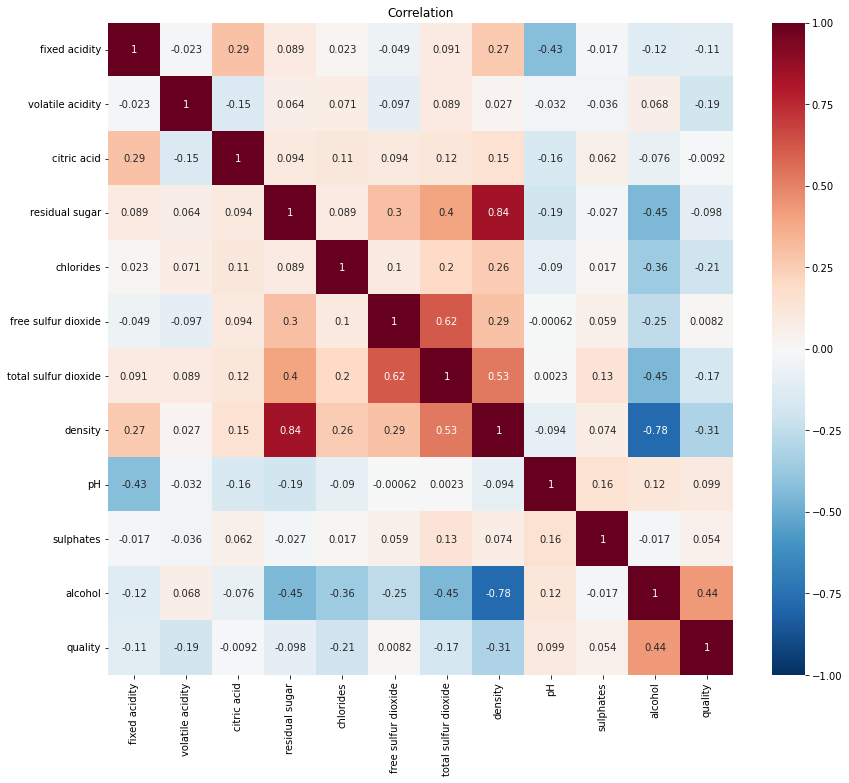

In [56]:
#(13)##https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
import seaborn as sns
correlation = wine.corr()
plt.figure(figsize=(14,12))
plt.title('Correlation')
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show()

In [57]:
(14)###https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
from sklearn import svm
from sklearn import metrics
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(x_train,y_train)
g=SV.predict(x_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.42959183673469387

In [58]:
#(15)##https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
g=nb.predict(x_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.4469387755102041

In [59]:
#(16)##https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
from sklearn.linear_model import LogisticRegression
f=LogisticRegression(max_iter=10000)
f.fit(x_train,y_train)
g=f.predict(x_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")

0.5306122448979592

In [60]:
#(17)##https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
from sklearn.tree import DecisionTreeClassifier
DTC2= DecisionTreeClassifier()
DTC2.fit(x_train,y_train)
g=DTC2.predict(x_test)
print(metrics.accuracy_score(y_test,g))
print(metrics.f1_score(y_test,g,average="micro"))

0.5897959183673469
0.5897959183673469


In [61]:
#(18)##https://www.kaggle.com/melvin97n/analysis-using-regression-classification-wine
from sklearn.ensemble import RandomForestClassifier
RF2= RandomForestClassifier()
RF2.fit(x_train, y_train)
g=RF2.predict(x_test)
print(metrics.accuracy_score(y_test,g))

0.6540816326530612


In [62]:
#(19##)ttps://www.codexa.net/ml-evaluation-cls/
#混同行列、正解率、適合率、再現率、F 値を表示
Y_pred=y_pred
Y_test=y_test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
print('confusion matrix = \n', confusion_matrix(y_true = Y_test, y_pred = Y_pred))
print('accuracy = ',accuracy_score(y_true = Y_test , y_pred = Y_pred))
print('precision = ',precision_score(y_true = Y_test , y_pred = Y_pred, average='micro'))
print('recall = ',recall_score(y_true = Y_test , y_pred = Y_pred, average='micro'))
print('f1 score = ',f1_score(y_true = Y_test , y_pred = Y_pred, average='micro'))

confusion matrix = 
 [[  0   1   2   1   0   0   0]
 [  0   9  18   4   1   0   0]
 [  0   1 205  90   3   0   0]
 [  0   0  54 339  28   1   0]
 [  0   0   2  90  91   1   0]
 [  0   0   1  11  12  13   0]
 [  0   0   0   2   0   0   0]]
accuracy =  0.6704081632653062
precision =  0.6704081632653062
recall =  0.6704081632653062
f1 score =  0.6704081632653062


In [63]:
#(21)  EX_6_Bayes_Kaggle[1]
#https://www.kaggle.com/dskagglemt/breast-cancer-using-naive-bayes
#MAYANK TRIPATHI · 1Y AGO · 883 VIEWS
#Breast Cancer using Naive Bayes
#211102:ML
print('211102:ML:breast_cancer_data: Bayes Regression')
import datetime
print(datetime.datetime.now() )

211102:ML:breast_cancer_data: Bayes Regression
2022-11-15 07:15:20.398883


In [64]:
#(22)::Bayes2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Model specific Library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [65]:
#(23)::Bayes3 
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
breast_cancer
#内容を確認する（ざっと見る）

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [66]:
##(24) #Create Dataframe¶::Bayes4
#Create dataframe out of the keys which are intreset to us.
df = pd.DataFrame(
    np.c_[breast_cancer.data, breast_cancer.target], 
    columns = [list(breast_cancer.feature_names)+ ['target']]
                 )

In [67]:
#(25) Split the data into X and y¶::Bayes5
X = df.iloc[:, 0:-1]##左がコロン：なので、任意の行＝全行、右は0 から-1 までで-1 は最後を除くことを意味する
                    ##  X = df.iloc[:, 0-30]  と同じ意味になる（全部で31 列あり、そのうち0 列から29 列まで取り出す）
y = df.iloc[:,-1]

In [68]:
#(26) ::Bayes6
##データX,y をtrain80%ｔｏtest20%に分ける:random_state は乱数のシード（種）の値
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 999)

In [69]:
#(27)::Bayes7: Gaussian Naive Bayes¶
clf = GaussianNB()
#(16) 学習
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GaussianNB()

In [70]:
#(28)Bayes8::評価値、score は決定係数
print("clf.score(X_train, y_train=)=",clf.score(X_train, y_train))
print("clf.score(X_val, y_val)=",clf.score(X_val, y_val))

clf.score(X_train, y_train=)= 0.9516483516483516
clf.score(X_val, y_val)= 0.9210526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


thres= [2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 9.98866521e-001 9.82697791e-001 9.11240518e-001
 5.41323108e-001 2.53837360e-001 9.02022292e-007 2.38938014e-008
 5.99852163e-243]
fpr= [0.         0.         0.         0.         0.         0.
 0.01960784 0.01960784 0.03921569 0.03921569 0.09803922 0.09803922
 0.1372549  0.1372549  0.19607843 0.19607843 1.        ]
tpr= [0.         0.22222222 0.25396825 0.34920635 0.38095238 0.71428571
 0.71428571 0.82539683 0.82539683 0.95238095 0.95238095 0.96825397
 0.96825397 0.98412698 0.98412698 1.         1.        ]
beast_cancer_Bayes, auc:0.9859943977591037


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0, 0.5, 'TPR: True Positive Rete')

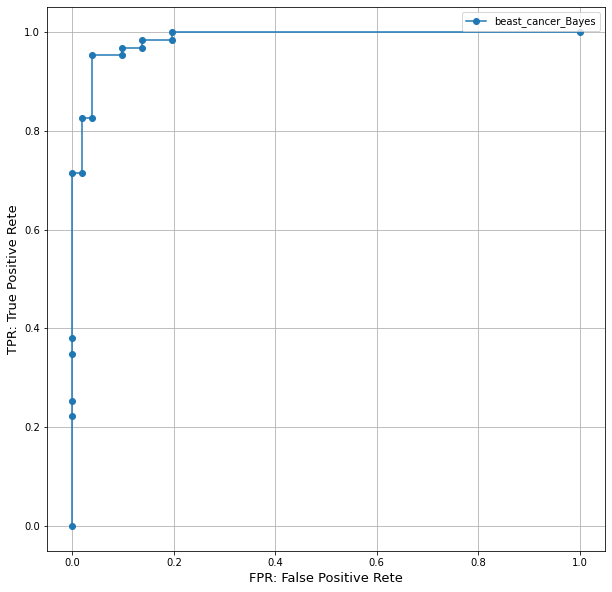

In [71]:
#(29)::Bayes9::https://yolo-kiyoshi.com/2020/08/02/post-2107/
from sklearn.metrics import confusion_matrix, roc_curve
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
##for model in models:
for i in [0]:
    ##model_name = model.__class__.__name__
    fpr, tpr, thres = roc_curve(y_val, clf.predict_proba(X_val)[:, 1])
    print("thres=",thres)###ROC を描くためのthreshold
    print("fpr=",fpr)
    print("tpr=",tpr)
    auc = metrics.auc(fpr, tpr)
    # 特異度
    sng = 1 - fpr
    # Youden index を用いたカットオフ基準
    ##cutoff_criterion = tpr + sng - 1
    ##cutoff_criterions.append(cutoff_criterion)
    model_name='beast_cancer_Bayes'
    print(f'{model_name}, auc:{auc}')
    ax.plot(fpr, tpr, marker='o', label=model_name)    
ax.legend()
ax.grid()
ax.set_xlabel('FPR: False Positive Rete', fontsize = 13)
ax.set_ylabel('TPR: True Positive Rete', fontsize = 13)
##ROC 曲線（2 クラスしかできない）

In [74]:

#(40) モデルの木構造の視覚化に必要なパッケージ###https://qiita.com/takahashi_yukou/items/5251bada1c3dc453c508
from sklearn import tree
import pydotplus as pdp
quality_index=[0,1,2,3,4,5,6,7,8,9,10]
# 試しに木の一つを視覚化する
estimators =model.estimators_
file_name = "./wine_tree_vis.png"
print("wine.columns.values=",wine.columns.values)
dot_data = tree.export_graphviz(estimators[0], # 決定木オブジェクトを一つ指定する
                                out_file=None, # ファイルは介さずにGraphviz にdot 言語データを渡すのでNone
                                filled=True, # True にすると、分岐の際にどちらのノードに多く分類されたのか色で示してくれる
                                rounded=True, # True にすると、ノードの角を丸く描画する。
                                feature_names=quality_index,##quality は目的変数 # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=wine.columns.values, # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True # 特殊文字を扱えるようにする
                                )
graph = pdp.graph_from_dot_data(dot_data)
graph.write_png(file_name)
#(41) ##(4)https://uepon.hatenadiary.com/entry/2018/03/30/185145
from IPython.display import Image,display_png

wine.columns.values= ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.457633 to fit

